In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
from scipy.optimize import curve_fit

In [2]:
frecuencias = [30, 20, 10, 5, 3, 2, 1, 0.5] #en Hz
numF = np.arange(1,9)
datos_f1 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_30')
datos_f2 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_20')
datos_f3 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_10')
datos_f4 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_5')
datos_f5 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_3')
datos_f6 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_2')
datos_f7 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_1')
datos_f8 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_0.5')

#Vin = 4V

In [3]:
datos_frec = [datos_f1, datos_f2, datos_f3, datos_f4, datos_f5, datos_f6, datos_f7, datos_f8]

#datos_frec

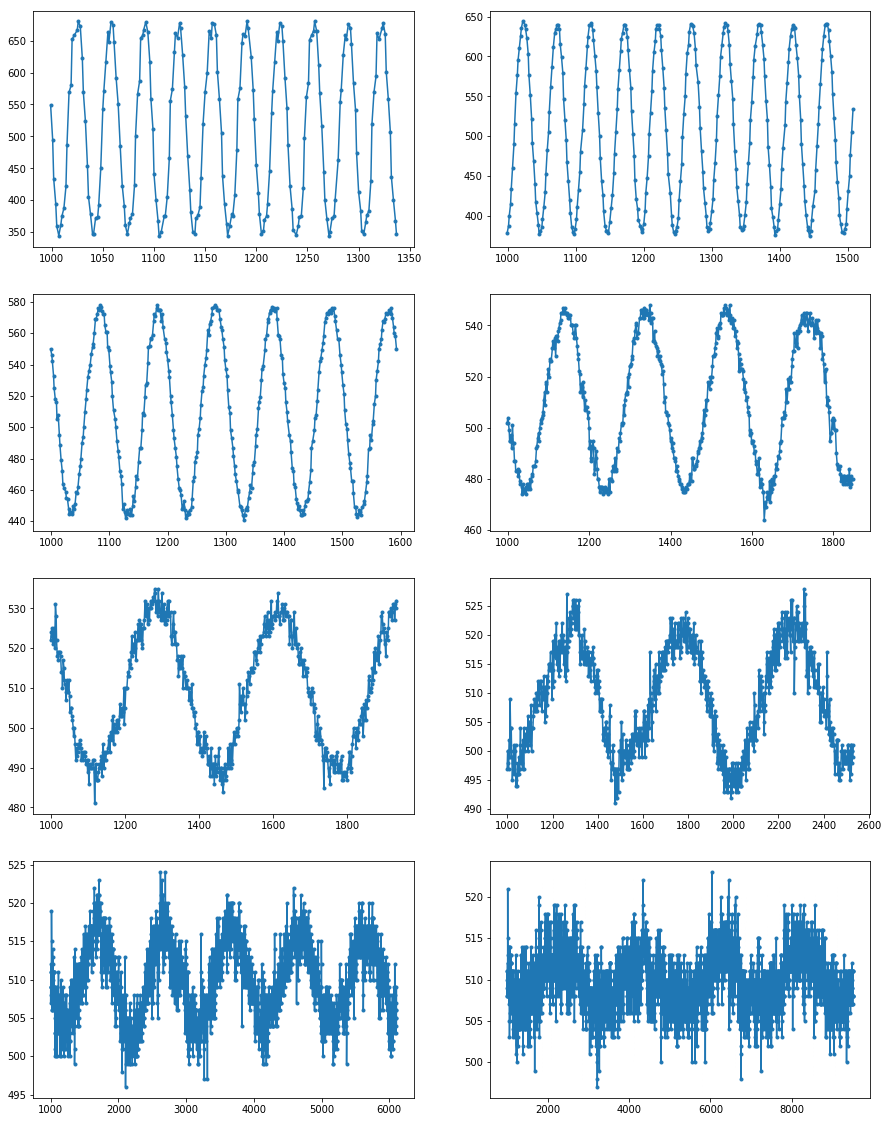

In [4]:
fin = [200, 300, 350, 500, 550, 900, 3000, 5000 ]
plt.figure(figsize=(15,20))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(datos_frec[i][:fin[i],1], datos_frec[i][:fin[i],2], '.-')
    #plt.xlim(4000,5000)
    
plt.show()

In [5]:
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

def ajusteseno(datos_x, datos_y,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos_x, datos_y, sigma = 0.005*np.ones(len(datos_x)), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

In [6]:
tiempo_f = []
volt_f = []
for i in range(8):
    tiempo_f.append(datos_frec[i][:fin[i],1]/1000) #para convertirlo a segundos
    volt_f.append(datos_frec[i][:fin[i],2])

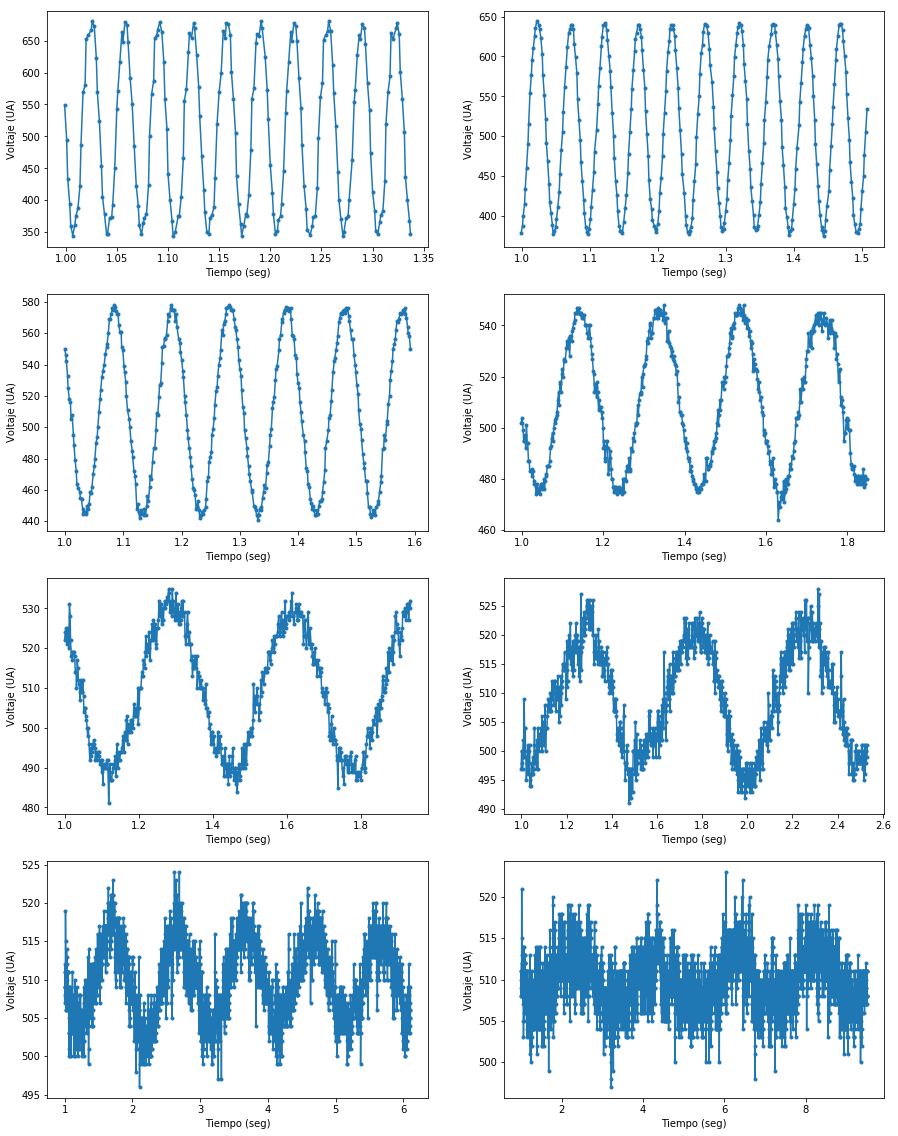

In [7]:
plt.figure(figsize=(15,20))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(tiempo_f[i], volt_f[i], '.-')
    plt.xlabel('Tiempo (seg)')
    plt.ylabel('Voltaje (UA)')
    #plt.xlim(4000,5000)
    
plt.show()

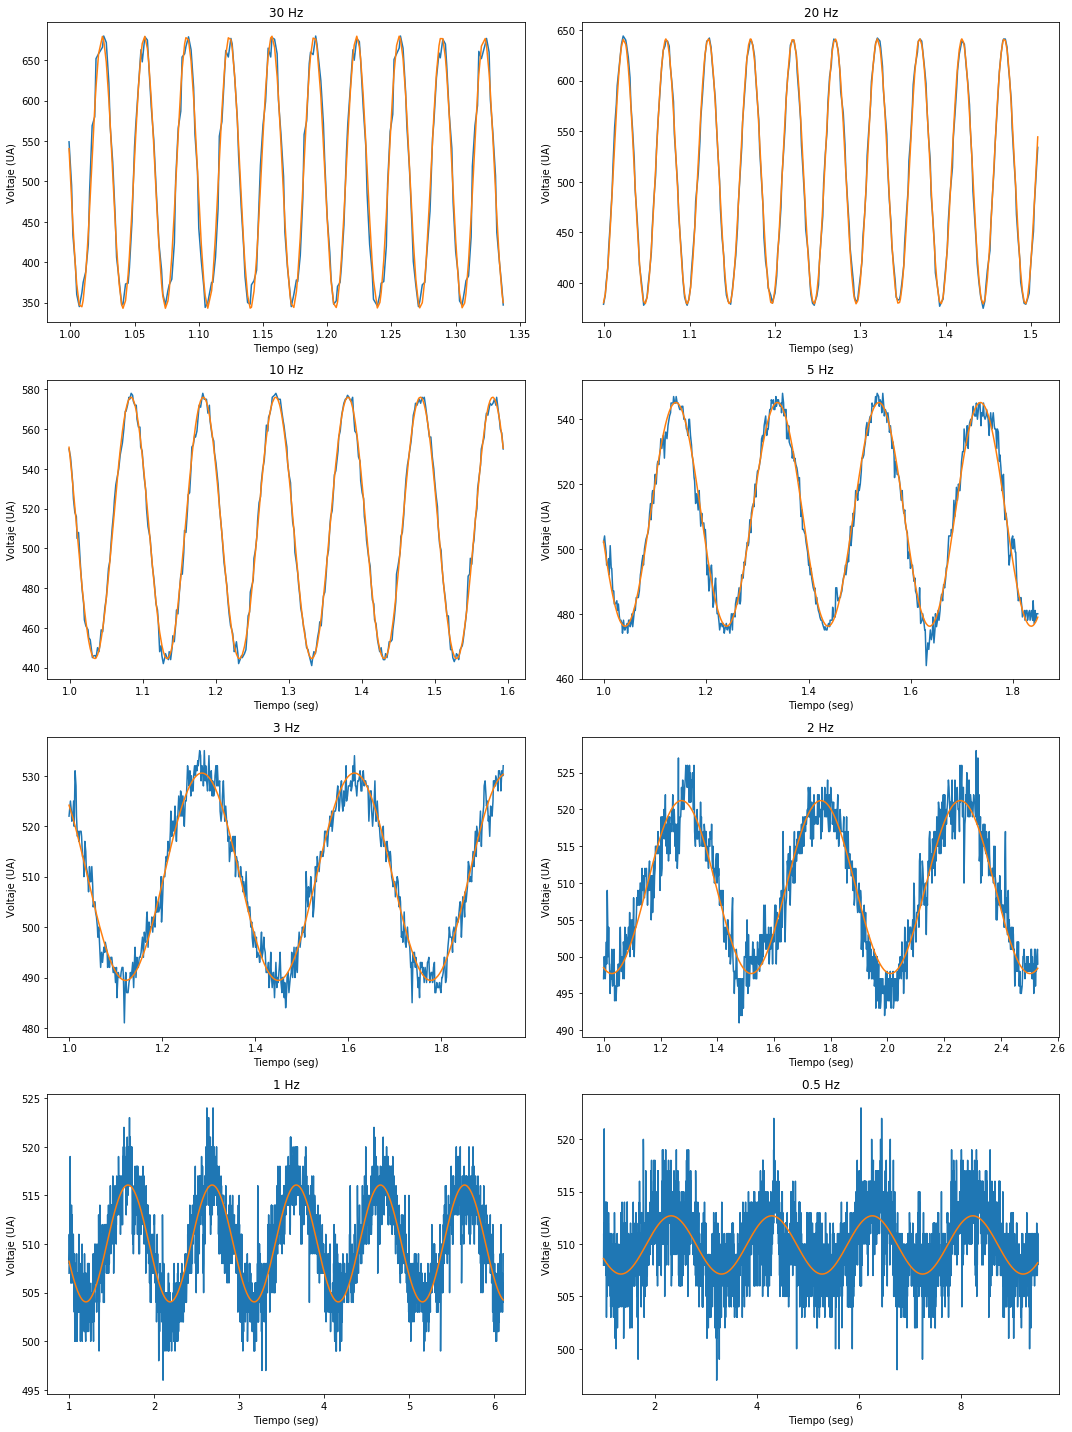

In [9]:
legend_frecs = ['30 Hz', '20 Hz', '10 Hz', '5 Hz', '3 Hz', '2 Hz', '1 Hz', '0.5 Hz']
A=[]
Aperr=[]
difs = []
plt.figure(figsize=(15,20))

for j in range(8):
    D_aux = int(np.mean(datos_frec[j][:fin[j],2]))
    A_aux = np.max(datos_frec[j][:fin[j],2])- D_aux
    popt_sin, pcov_sin=ajusteseno(tiempo_f[j], volt_f[j],po=[A_aux,2*np.pi*frecuencias[j],0,D_aux])
    A.append(popt_sin[0])
    Aperr.append(np.sqrt(pcov_sin[0,0])) #CHEQUEAR si no entendí mal, este sería el error de la amplitud
    difs.append([A_aux - popt_sin[0], 2*np.pi*frecuencias[j] - popt_sin[1], popt_sin[2], D_aux - popt_sin[3]])
    
    plt.subplot(4,2,j+1)
    plt.plot(tiempo_f[j],volt_f[j])
    plt.plot(tiempo_f[j], popt_sin[0] * np.sin(popt_sin[1]*tiempo_f[j]+popt_sin[2])+popt_sin[3])
    plt.tight_layout()
    plt.xlabel('Tiempo (seg)')
    plt.ylabel('Voltaje (UA)')
    plt.title(legend_frecs[j])
    
#plt.savefig('ajustes_frecuencias.png')
plt.show()
#print(difs)

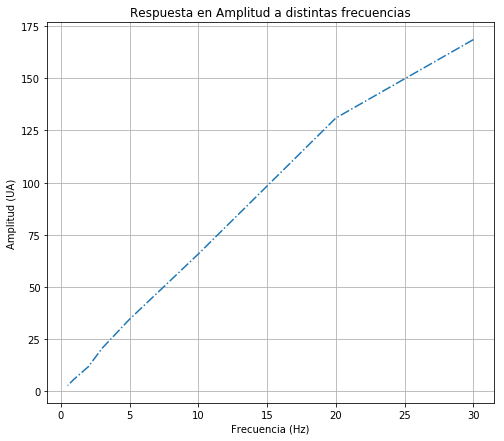

In [22]:
plt.figure(figsize=(8,7))
plt.errorbar(frecuencias, np.abs(A), Aperr, fmt='-.', ecolor = 'r')
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (UA)')
plt.title('Respuesta en Amplitud a distintas frecuencias')
#plt.savefig('amplitud_frecuencias.png')
plt.show()

In [13]:
numA = np.arange(1,6)
datos_amp = []
for i in numA:
    datos_amp.append((np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_A{}'.format(i))))

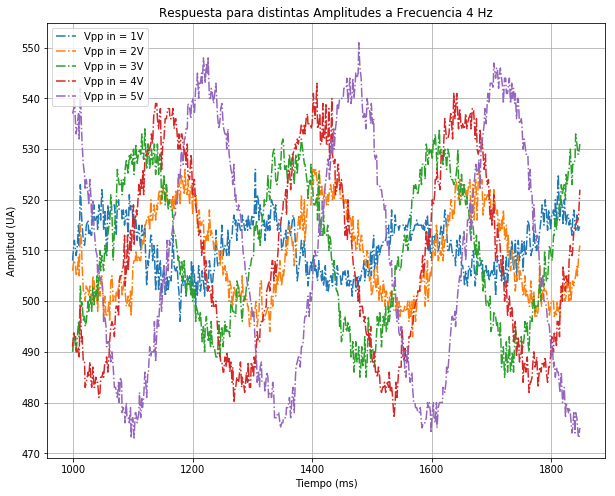

In [16]:
legend_amp = ['Vpp in = 1V', 'Vpp in = 2V', 'Vpp in = 3V', 'Vpp in = 4V', 'Vpp in = 5V']

fin = 500
plt.figure(figsize=(10,8))

for i in range(5):
    plt.plot(datos_amp[i][:fin,1], datos_amp[i][:fin,2], '-.', label=legend_amp[i])
    plt.grid()
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Amplitud (UA)')
    plt.legend()

plt.title('Respuesta para distintas Amplitudes a Frecuencia 4 Hz')
#plt.savefig('voltajes-entrada_4Hz.png')
plt.show()

In [17]:
tiempo_a = []
volt_a = []
for i in range(5):
    tiempo_a.append(datos_amp[i][:fin,1]/1000) #para convertirlo a segundos
    volt_a.append(datos_amp[i][:fin,2])

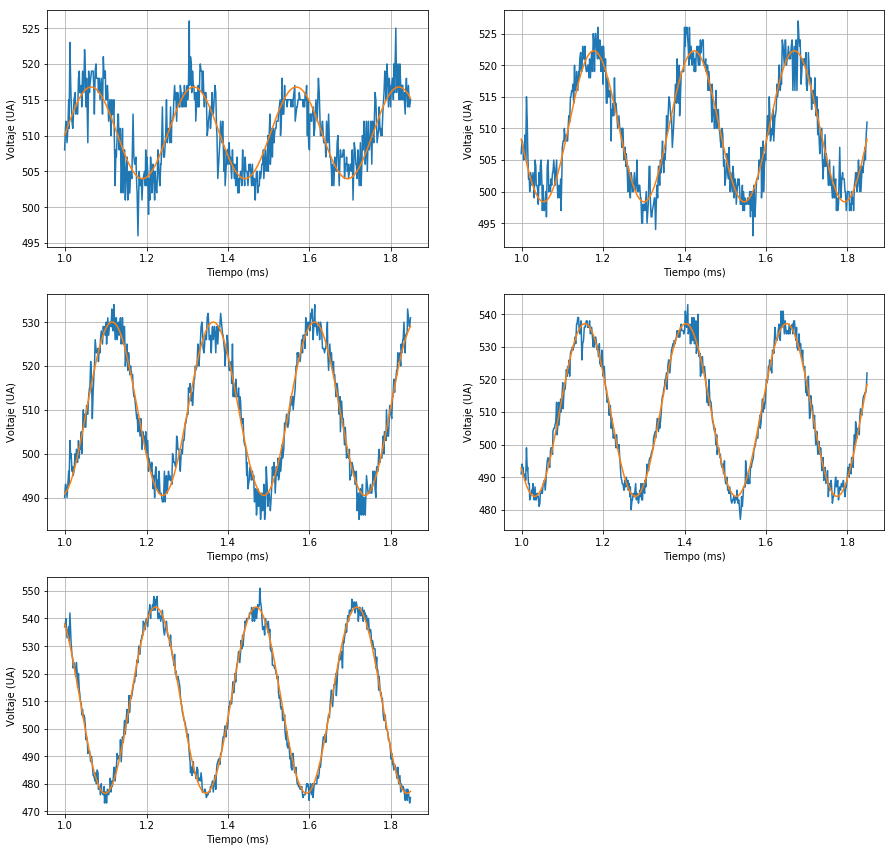

In [19]:

Amp=[]
Amperr=[]

plt.figure(figsize=(15,20))

for j in range(5):
    Da_aux = int(np.mean(datos_amp[j][:fin,2]))
    Amp_aux = np.max(datos_amp[j][:fin,2])- Da_aux
    popt_sin, pcov_sin=ajusteseno(tiempo_a[j], volt_a[j],po=[Amp_aux,2*np.pi*4,0,Da_aux])
    Amp.append(popt_sin[0])
    Amperr.append(np.sqrt(pcov_sin[0,0])) 
    difs.append([Amp_aux - popt_sin[0], 2*np.pi*4 - popt_sin[1], popt_sin[2], Da_aux - popt_sin[3]])
    
    plt.subplot(4,2,j+1)
    plt.plot(tiempo_a[j],volt_a[j])
    plt.plot(tiempo_a[j], popt_sin[0] * np.sin(popt_sin[1]*tiempo_a[j]+popt_sin[2])+popt_sin[3])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Voltaje (UA)')
    plt.grid()

#plt.savefig('voltajes-entrada_ajuste.png')
plt.show()


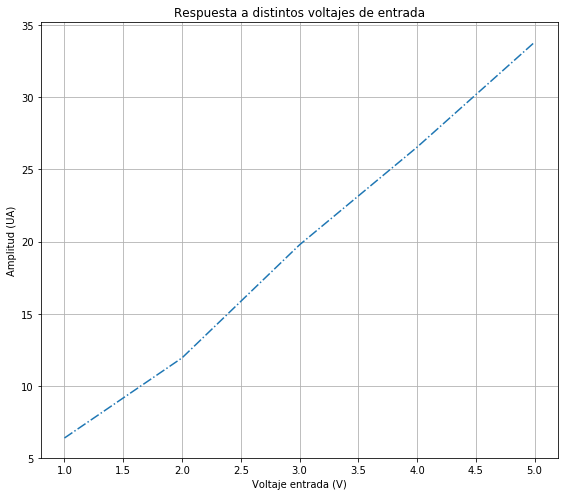

In [23]:
plt.figure(figsize=(8,7))
plt.errorbar(numA, np.abs(Amp), Amperr, fmt='-.', ecolor = 'r')
plt.grid()
plt.xlabel('Voltaje entrada (V)')
plt.ylabel('Amplitud (UA)')
plt.title('Respuesta a distintos voltajes de entrada')
plt.tight_layout()
#plt.savefig('amplitud_voltajes.png')
plt.show()

In [29]:
numA = np.arange(1,17)
data_amp = []
for i in numA:
    data_amp.append((np.loadtxt('/home/codorso/JoseAye/03_05/5Hz_A{}'.format(i))))

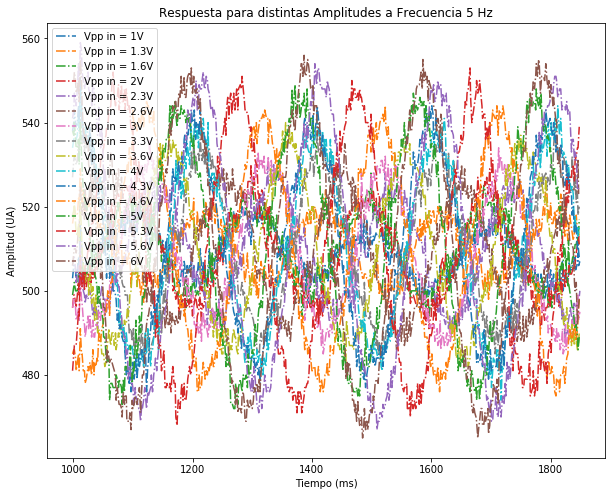

In [31]:
legend_amp = ['Vpp in = 1V', 'Vpp in = 1.3V', 'Vpp in = 1.6V', 'Vpp in = 2V', 'Vpp in = 2.3V', 'Vpp in = 2.6V', 'Vpp in = 3V', 'Vpp in = 3.3V', 'Vpp in = 3.6V', 'Vpp in = 4V', 'Vpp in = 4.3V', 'Vpp in = 4.6V', 'Vpp in = 5V', 'Vpp in = 5.3V', 'Vpp in = 5.6V', 'Vpp in = 6V']

fin = 500
plt.figure(figsize=(10,8))

for i in range(len(numA)):
    plt.plot(data_amp[i][:fin,1], data_amp[i][:fin,2], '-.', label=legend_amp[i])
    plt.grid()
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Amplitud (UA)')
    plt.legend()

plt.title('Respuesta para distintas Amplitudes a Frecuencia 5 Hz')
#plt.savefig('voltajes-entrada_5Hz.png')
plt.show()

In [32]:
tiempo_a = []
volt_a = []
for i in range(len(numA)):
    tiempo_a.append(data_amp[i][:fin,1]/1000) #para convertirlo a segundos
    volt_a.append(data_amp[i][:fin,2])

In [35]:
len(numA)

16

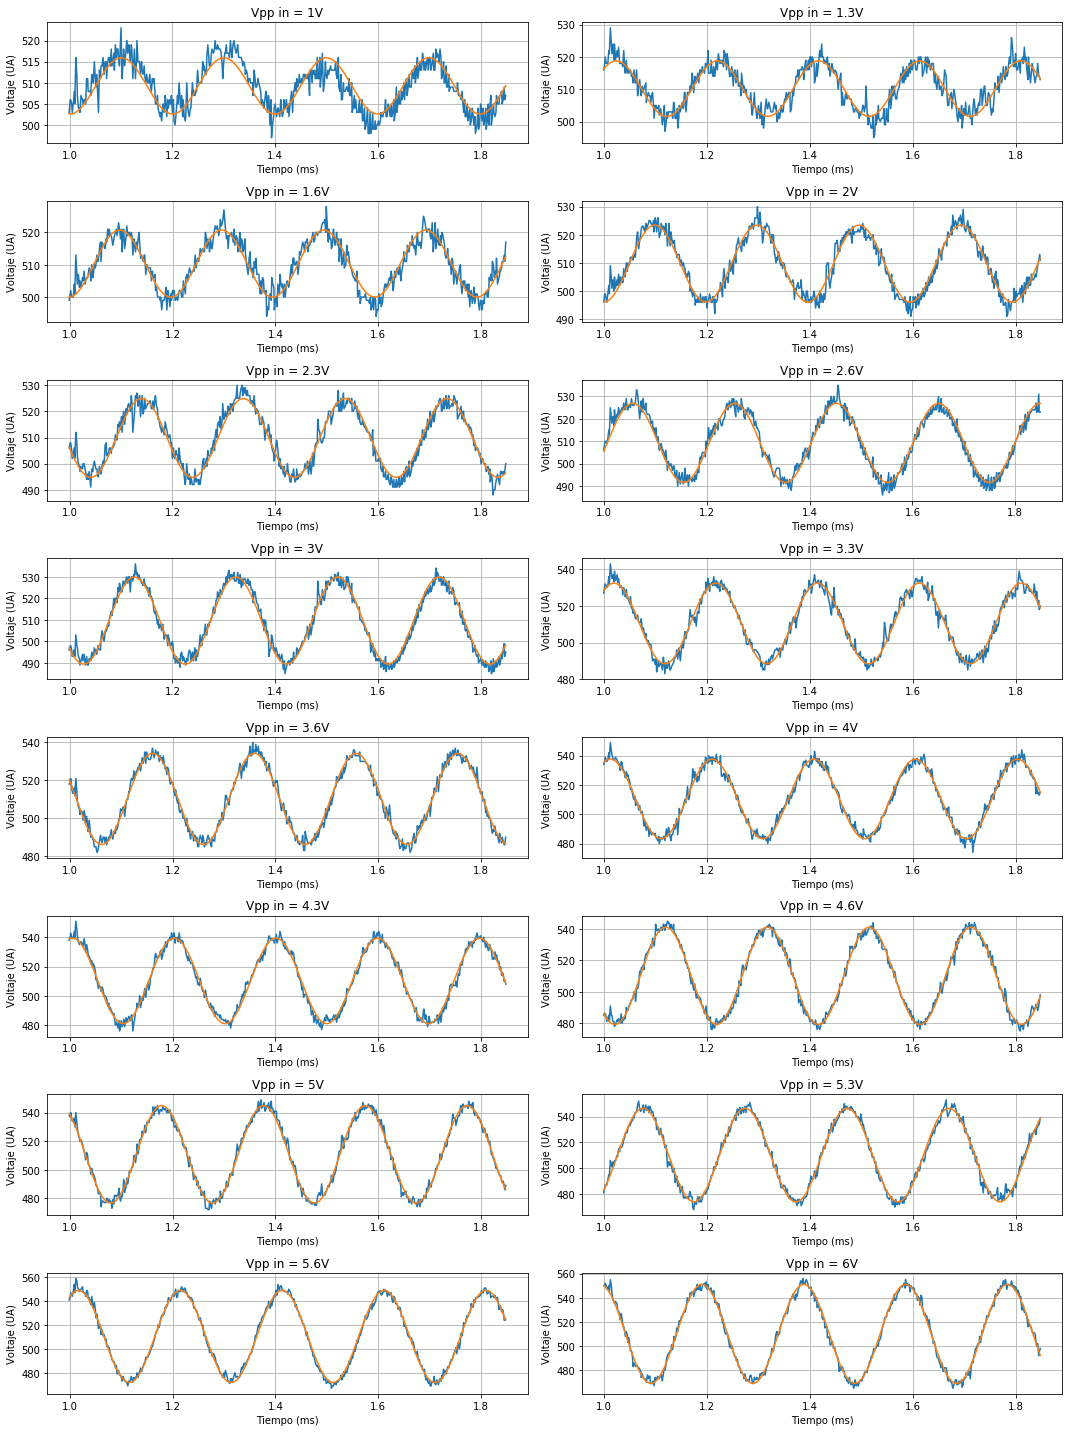

In [48]:
Amp=[]
Amperr=[]

plt.figure(figsize=(15,20))


for j in range(len(numA)):
    Da_aux = int(np.mean(data_amp[j][:fin,2]))
    Amp_aux = np.max(data_amp[j][:fin,2])- Da_aux
    popt_sin, pcov_sin=ajusteseno(tiempo_a[j], volt_a[j],po=[Amp_aux,2*np.pi*5,0,Da_aux])
    Amp.append(popt_sin[0])
    Amperr.append(np.sqrt(pcov_sin[0,0])) 
    difs.append([Amp_aux - popt_sin[0], 2*np.pi*4 - popt_sin[1], popt_sin[2], Da_aux - popt_sin[3]])
    
    
    plt.subplot(8,2,j+1)
    plt.plot(tiempo_a[j],volt_a[j])
    plt.plot(tiempo_a[j], popt_sin[0] * np.sin(popt_sin[1]*tiempo_a[j]+popt_sin[2])+popt_sin[3])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Voltaje (UA)')
    plt.grid()
    plt.title(legend_amp[j])#'a 5Hz')
    plt.tight_layout()

#plt.savefig('Voltajes-entrada_ajuste.png')
plt.show()


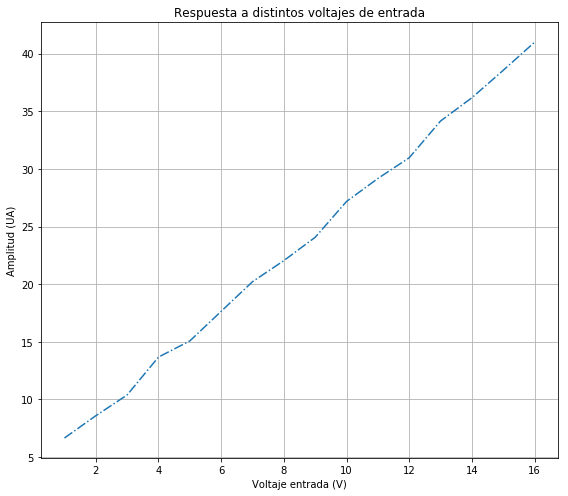

In [50]:
plt.figure(figsize=(8,7))
plt.errorbar(numA, np.abs(Amp), Amperr, fmt='-.', ecolor = 'r')
plt.grid()
plt.xlabel('Voltaje entrada (V)')
plt.ylabel('Amplitud (UA)')
plt.title('Respuesta a distintos voltajes de entrada')
plt.tight_layout()
#plt.savefig('Amplitud_voltajes.png')
plt.show()

In [51]:
Amperr

[0.00031626488248108237,
 0.0003128892748218201,
 0.0003180637039484152,
 0.0003175152808421289,
 0.00031375781888251855,
 0.0003184389427156714,
 0.00031220172172330673,
 0.0003123973479820421,
 0.0003201410723083939,
 0.0003138910017505691,
 0.0003159327205146767,
 0.00031257817656852503,
 0.0003216692277101949,
 0.00032238006961888974,
 0.0003126591594278647,
 0.00031986100935834397]